In [7]:
import pandas as pd
import sqlite3
import matplotlib.pyplot as plt

In [8]:
DB = '../data/checking-logs.sqlite'
conn = sqlite3.connect(DB)

query = """
SELECT timestamp AS datetime
FROM checker
WHERE uid LIKE 'user_%'
"""
data = pd.read_sql(query,conn)
conn.close()
data

,datetime
0,2020-04-17 05:19:02.744528
1,2020-04-17 05:22:35.249331
2,2020-04-17 05:22:45.549397
3,2020-04-17 05:34:14.691200
4,2020-04-17 05:34:24.422370
...,...
3202,2020-05-21 20:19:06.872761
3203,2020-05-21 20:22:41.785725
3204,2020-05-21 20:22:41.877806
3205,2020-05-21 20:37:00.129678


In [9]:
data['datetime'] = pd.to_datetime(data['datetime'])
data['hour'] = data['datetime'].dt.hour
data['weekday'] = data['datetime'].dt.weekday
data['is_weekend'] = data['weekday'] >=5
data.head()

,datetime,hour,weekday,is_weekend
0,2020-04-17 05:19:02.744528,5,4,False
1,2020-04-17 05:22:35.249331,5,4,False
2,2020-04-17 05:22:45.549397,5,4,False
3,2020-04-17 05:34:14.691200,5,4,False
4,2020-04-17 05:34:24.422370,5,4,False


In [10]:
grouped = data.groupby([data['datetime'].dt.date,'hour','is_weekend']).size().reset_index(name='count')
grouped

,datetime,hour,is_weekend,count
0,2020-04-17,5,False,13
1,2020-04-17,11,False,8
2,2020-04-17,12,False,2
3,2020-04-18,7,True,1
4,2020-04-18,13,True,5
...,...,...,...,...
283,2020-05-21,16,False,4
284,2020-05-21,17,False,1
285,2020-05-21,18,False,2
286,2020-05-21,19,False,8


In [11]:
df_sum = grouped.groupby(['hour','is_weekend'])['count'].sum().unstack()
df_sum.columns = ['working day','weekend']
df_sum

,working day,weekend
hour,,
0,6.0,6.0
1,NaN,6.0
3,2.0,1.0
5,15.0,2.0
6,3.0,NaN
7,31.0,16.0
8,37.0,28.0
9,30.0,22.0
10,132.0,28.0


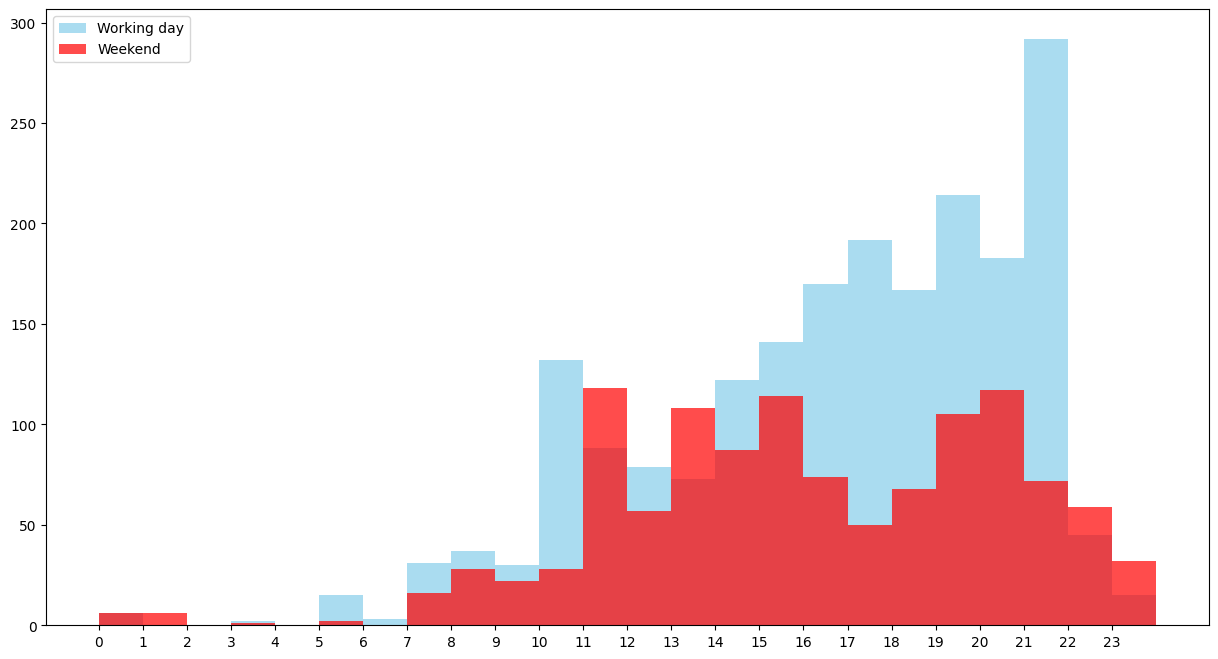

In [12]:
df_sum_filled = df_sum.fillna(0)


working_day_raw = []
weekend_raw = []

working_day_raw = [hour for hour, count in df_sum_filled['working day'].items() for _ in range(int(count))]
weekend_raw = [hour for hour, count in df_sum_filled['weekend'].items() for _ in range(int(count))]


plt.figure(figsize=(15, 8))

plt.hist(working_day_raw, bins=range(25), alpha=0.7, label='Working day', color='skyblue')
plt.hist(weekend_raw, bins=range(25), alpha=0.7, label='Weekend', color='red')

plt.xticks(range(24))
plt.legend()
# plt.grid(axis='y', linestyle='--', alpha=0.3)
plt.show()


Are there hours when the total number of commits was higher on weekends than on working days?

The answer is
11st hour, 
13rd hour, 
22nd hour, 
23rd hour. 